## Imports

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from plottable import Table
from scipy.stats import pearsonr, shapiro, mannwhitneyu, chi2_contingency, fisher_exact, ttest_ind
from plottable.cmap import normed_cmap
import itertools
import statsmodels.stats.multitest as smm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest

## Dataset

In [ ]:
player_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\player_df.csv') 
player_data

,ID,player_name,height_cm,weight_kg,age,experience_years
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7
1,1Jal,Jalen Williams,198,99,23,3
2,2Lug,Luguentz Dort,193,99,25,6
3,3Isa,Isaiah Hartenstein,213,115,26,7
4,4Cas,Cason Wallace,193,92,21,2
...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9
346,346Col,Collin Sexton,190,86,21,7
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7
348,348T.J,T.J. Warren,203,99,26,9


In [ ]:
position_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\position_df_r.csv') 
position_data

,ID,positions,ID_positions
0,0Sha,Point Guard,2
1,0Sha,Shooting Guard,4
2,1Jal,Shooting Guard,4
3,1Jal,Power Forward,3
4,2Lug,Small Forward,5
...,...,...,...
638,347Sha,Shooting Guard,4
639,348T.J,Small Forward,5
640,348T.J,Power Forward,3
641,349Spe,Point Guard,2


In [ ]:
season_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\seasons_df.csv') 
season_data

,ID,rank,season,groupName,ID_seasons
0,0Sha,NaN,2025,LC,25
1,1Jal,NaN,2025,LC,25
2,2Lug,NaN,2025,LC,25
3,3Isa,NaN,2025,LC,25
4,4Cas,NaN,2025,LC,25
...,...,...,...,...,...
345,345Pas,21.0,2020,TS,20
346,346Col,22.0,2020,TS,20
347,347Sha,23.0,2020,TS,20
348,348T.J,24.0,2020,TS,20


In [ ]:
group_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\group_df.csv') 
group_data

,ID_group,groupName
0,1,MJT
1,2,LC
2,3,TS


## New Table

In [ ]:
merged_player_season = pd.merge(player_data, season_data, on='ID')
merged_player_season_group = pd.merge(merged_player_season, group_data, on='groupName')
merged_player_season_group

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
...,...,...,...,...,...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9,21.0,2020,TS,20,3
346,346Col,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3
348,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3


## Analysis

<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
توزیع قد بازیکنانی که در لیست Michael Jordan Trophy حضور دارند را با ۵۰ بازیکن برتر فصل با
توجه به آمار فصلها از فصل ۲۰۲۰-۲۰۱۹ تا پایان ۲۰۲۴-۲۰۲۳ تهیه کنید.
</p>

In [40]:
mjt_players = merged_player_season_group[merged_player_season_group['groupName'] == 'MJT']

mjt_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
115,115Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,MJT,25,1
116,116Nik,Nikola Jokić,211,128,29,10,2.0,2025,MJT,25,1
117,117Gia,Giannis Antetokounmpo,211,109,30,12,3.0,2025,MJT,25,1
118,118Jay,Jayson Tatum,203,95,26,8,4.0,2025,MJT,25,1
119,119Don,Donovan Mitchell,190,97,28,8,5.0,2025,MJT,25,1
...,...,...,...,...,...,...,...,...,...,...,...
195,195Kev,Kevin Durant,211,108,30,17,8.0,2019,MJT,19,1
196,196Kaw,Kawhi Leonard,201,102,27,13,9.0,2019,MJT,19,1
197,197Rus,Russell Westbrook,193,90,30,17,10.0,2019,MJT,19,1
198,198Rud,Rudy Gobert,216,117,26,12,11.0,2019,MJT,19,1


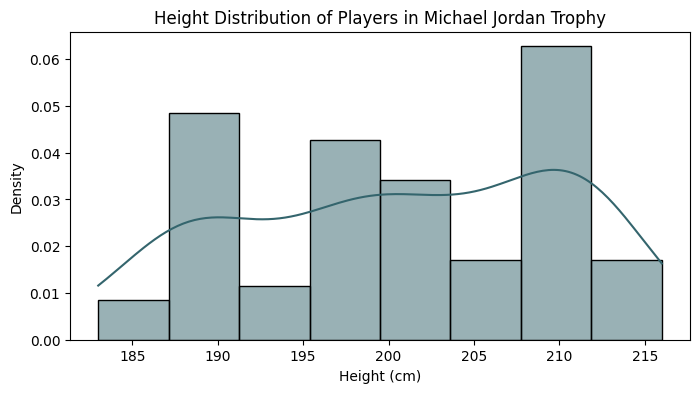

In [58]:
plt.figure(figsize=(8, 4))
sns.histplot(mjt_players['height_cm'], kde=True, color='#34656D', stat='density')

plt.title('Height Distribution of Players in Michael Jordan Trophy')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

In [47]:
height_stats = mjt_players['height_cm'].describe()
height_stats

count     85.000000
mean     200.741176
std        9.323745
min      183.000000
25%      193.000000
50%      201.000000
75%      211.000000
max      216.000000
Name: height_cm, dtype: float64

In [50]:
ts_players = merged_player_season_group[merged_player_season_group['groupName'] == 'TS']
ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
...,...,...,...,...,...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9,21.0,2020,TS,20,3
346,346Col,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3
348,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3


In [112]:
top_players_five_season = ts_players[(ts_players['season'] >= 2019) & (ts_players['season'] <= 2024)]
top_players_five_season

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
225,225Luk,Luka Dončić,198,104,24,7,1.0,2024,TS,24,3
226,226Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,TS,24,3
227,227Gia,Giannis Antetokounmpo,211,109,29,12,3.0,2024,TS,24,3
228,228Jal,Jalen Brunson,188,86,27,7,4.0,2024,TS,24,3
229,229Nik,Nikola Jokić,211,128,28,10,5.0,2024,TS,24,3
...,...,...,...,...,...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9,21.0,2020,TS,20,3
346,346Col,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3
348,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3


In [115]:
top_players_each_season = top_players_five_season[top_players_five_season['rank'] <= 10]
top_players_each_season

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
225,225Luk,Luka Dončić,198,104,24,7,1.0,2024,TS,24,3
226,226Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,TS,24,3
227,227Gia,Giannis Antetokounmpo,211,109,29,12,3.0,2024,TS,24,3
228,228Jal,Jalen Brunson,188,86,27,7,4.0,2024,TS,24,3
229,229Nik,Nikola Jokić,211,128,28,10,5.0,2024,TS,24,3
230,230Ant,Anthony Edwards,193,102,22,5,6.0,2024,TS,24,3
231,231Kev,Kevin Durant,211,108,35,17,7.0,2024,TS,24,3
232,232Jay,Jayson Tatum,203,95,25,8,8.0,2024,TS,24,3
233,233De',De'Aaron Fox,190,83,26,8,9.0,2024,TS,24,3
234,234Ste,Stephen Curry,188,83,35,16,10.0,2024,TS,24,3


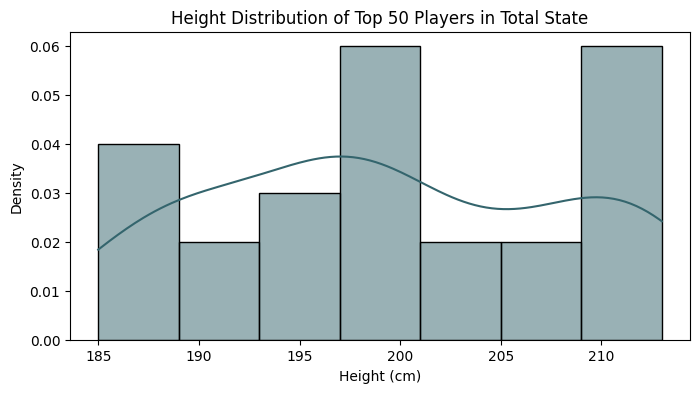

In [116]:
plt.figure(figsize=(8, 4))
sns.histplot(top_players_each_season['height_cm'], kde=True, color='#34656D', stat='density')

plt.title('Height Distribution of Top 50 Players in Total State')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

In [117]:
height_stats = top_players_each_season['height_cm'].describe()
height_stats

count     50.000000
mean     199.420000
std        8.873464
min      185.000000
25%      193.000000
50%      198.000000
75%      207.500000
max      213.000000
Name: height_cm, dtype: float64

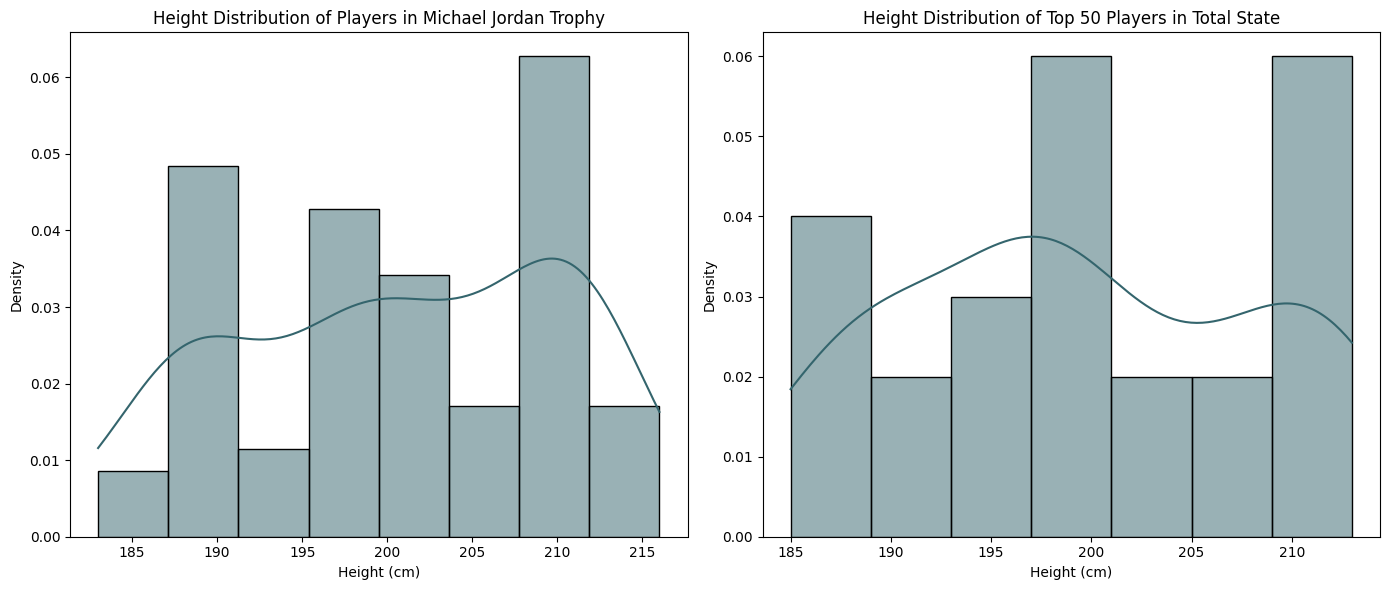

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(mjt_players['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[0])
axes[0].set_title('Height Distribution of Players in Michael Jordan Trophy')
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Density')

sns.histplot(top_players_each_season['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[1])
axes[1].set_title('Height Distribution of Top 50 Players in Total State')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
توزیع میزان تجربه افراد فعال، در تیم قهرمان و قد در دو فصل آخر را با توزیع میزان تجربه و قد ۱۵
بازیکن برتر آن فصل مقایسه کنید.
</p>

In [88]:
lc_players = merged_player_season_group[merged_player_season_group['groupName'] == 'LC']
lc_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
...,...,...,...,...,...,...,...,...,...,...,...
110,110Tro,Troy Daniels,193,90,28,7,NaN,2020,LC,20,2
111,111Dev,Devontae Cacok,201,108,23,3,NaN,2020,LC,20,2
112,112Jar,Jared Dudley,198,107,34,14,NaN,2020,LC,20,2
113,113Kos,Kostas Antetokounmpo,208,90,22,3,NaN,2020,LC,20,2


In [120]:
# plt.figure(figsize=(8, 4))
# sns.histplot(lc_players['experience_years'], kde=True, color='#34656D', stat='density')

# plt.title('Experience Distribution of Champion Team')
# plt.xlabel('Experience (years)')
# plt.ylabel('Density')
# plt.show()

In [121]:
# height_stats = lc_players['experience_years'].describe()
# height_stats

In [68]:
last_two_years_lc_players = lc_players[lc_players['season'] >= 2024]
last_two_years_lc_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
5,5Che,Chet Holmgren,216,96,22,2,NaN,2025,LC,25,2
6,6Aar,Aaron Wiggins,198,90,26,4,NaN,2025,LC,25,2
7,7Isa,Isaiah Joe,196,82,25,5,NaN,2025,LC,25,2
8,8Ale,Alex Caruso,196,84,30,8,NaN,2025,LC,25,2
9,9Jay,Jaylin Williams,203,113,22,3,NaN,2025,LC,25,2


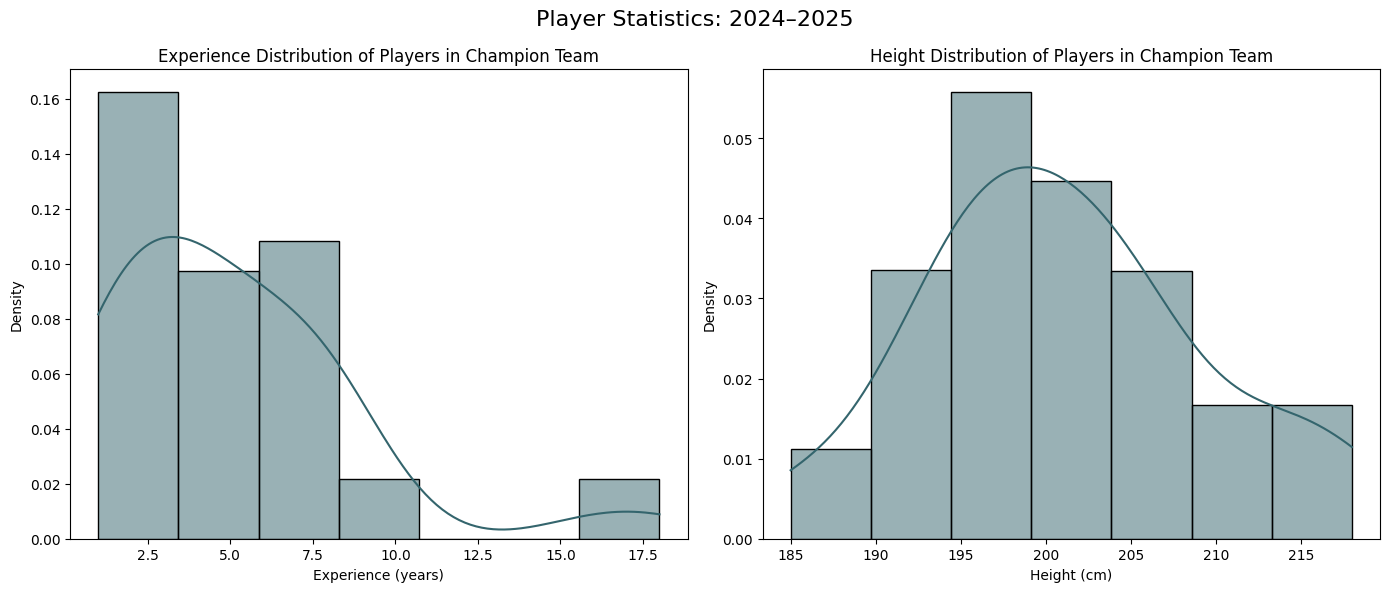

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(last_two_years_lc_players['experience_years'], kde=True, color='#34656D', stat='density', ax=axes[0])
axes[0].set_title('Experience Distribution of Players in Champion Team')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Density')

sns.histplot(last_two_years_lc_players['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[1])
axes[1].set_title('Height Distribution of Players in Champion Team')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2024–2025', fontsize=16)

plt.tight_layout()
plt.show()

In [128]:
height_stats = last_two_years_lc_players[['experience_years', 'height_cm']].describe()
height_stats

,experience_years,height_cm
count,38.000000,38.000000
mean,5.052632,201.105263
std,3.812833,8.271702
min,1.000000,185.000000
25%,2.000000,196.000000
50%,4.000000,201.000000
75%,7.000000,206.000000
max,18.000000,218.000000


In [132]:
twenty_four_lc_players = lc_players[lc_players['season'] == 2024]
twenty_four_lc_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
19,19Jay,Jayson Tatum,203,95,25,8,NaN,2024,LC,24,2
20,20Jay,Jaylen Brown,198,101,27,9,NaN,2024,LC,24,2
21,21Jru,Jrue Holiday,193,92,33,16,NaN,2024,LC,24,2
22,22Der,Derrick White,193,86,29,8,NaN,2024,LC,24,2
23,23Kri,Kristaps Porziņģis,218,108,28,9,NaN,2024,LC,24,2
24,24Al,Al Horford,206,108,37,18,NaN,2024,LC,24,2
25,25Pay,Payton Pritchard,185,88,26,5,NaN,2024,LC,24,2
26,26Sam,Sam Hauser,203,97,26,4,NaN,2024,LC,24,2
27,27Luk,Luke Kornet,218,113,28,8,NaN,2024,LC,24,2
28,28Xav,Xavier Tillman Sr.,203,111,25,5,NaN,2024,LC,24,2


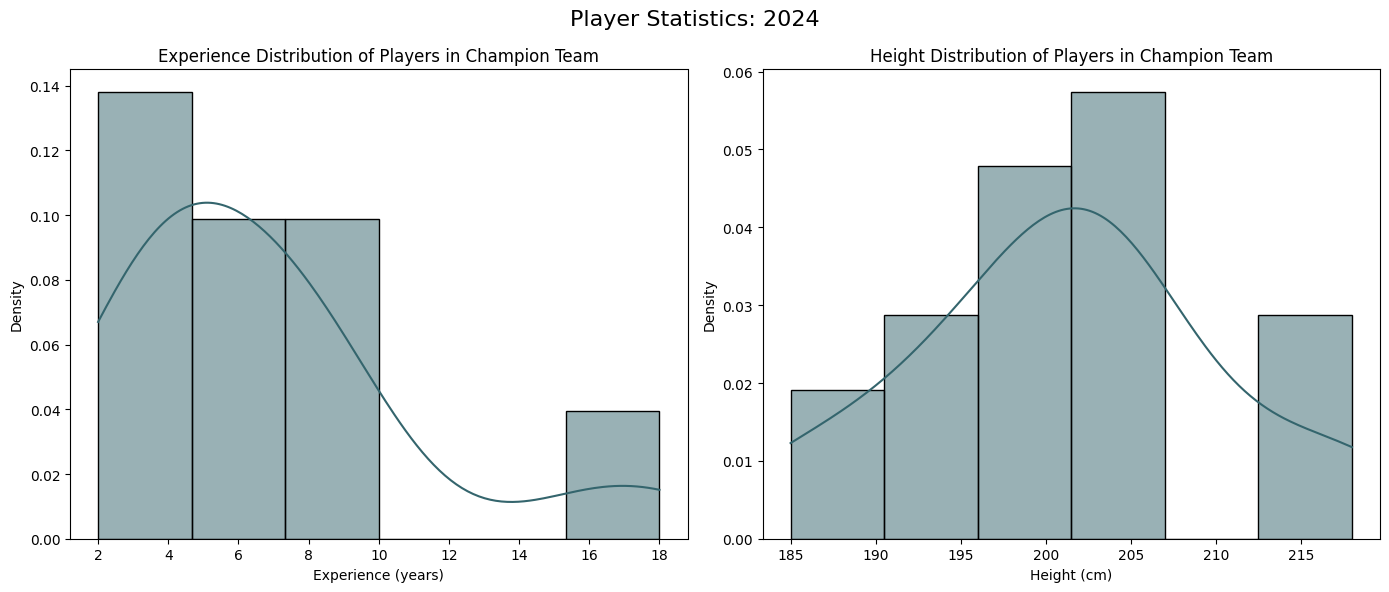

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(twenty_four_lc_players['experience_years'], kde=True, color='#34656D', stat='density', ax=axes[0])
axes[0].set_title('Experience Distribution of Players in Champion Team')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Density')

sns.histplot(twenty_four_lc_players['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[1])
axes[1].set_title('Height Distribution of Players in Champion Team')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2024', fontsize=16)

plt.tight_layout()
plt.show()

In [134]:
height_stats = twenty_four_lc_players[['experience_years', 'height_cm']].describe()
height_stats

,experience_years,height_cm
count,19.000000,19.000000
mean,6.684211,201.263158
std,4.256402,9.218593
min,2.000000,185.000000
25%,4.000000,195.500000
50%,5.000000,201.000000
75%,8.000000,206.000000
max,18.000000,218.000000


In [135]:
twenty_five_lc_players = lc_players[lc_players['season'] == 2025]
twenty_five_lc_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
5,5Che,Chet Holmgren,216,96,22,2,NaN,2025,LC,25,2
6,6Aar,Aaron Wiggins,198,90,26,4,NaN,2025,LC,25,2
7,7Isa,Isaiah Joe,196,82,25,5,NaN,2025,LC,25,2
8,8Ale,Alex Caruso,196,84,30,8,NaN,2025,LC,25,2
9,9Jay,Jaylin Williams,203,113,22,3,NaN,2025,LC,25,2


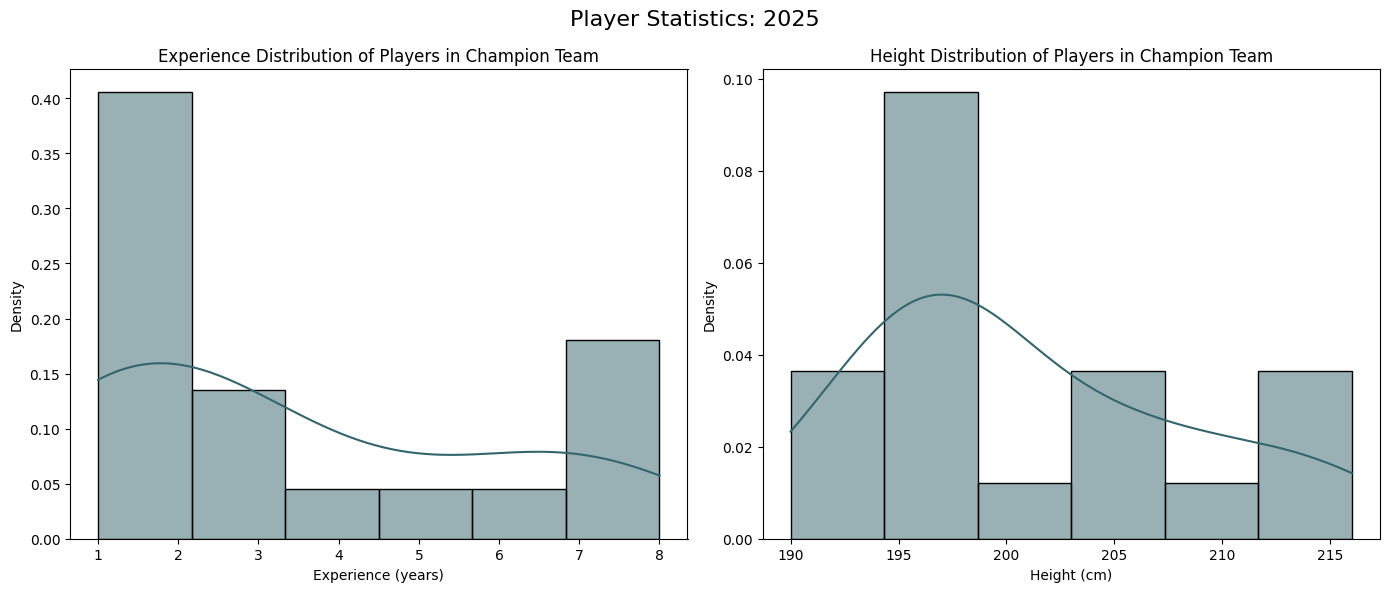

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(twenty_five_lc_players['experience_years'], kde=True, color='#34656D', stat='density', ax=axes[0])
axes[0].set_title('Experience Distribution of Players in Champion Team')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Density')

sns.histplot(twenty_five_lc_players['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[1])
axes[1].set_title('Height Distribution of Players in Champion Team')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2025', fontsize=16)

plt.tight_layout()
plt.show()

In [137]:
height_stats = twenty_five_lc_players[['experience_years', 'height_cm']].describe()
height_stats

,experience_years,height_cm
count,19.000000,19.000000
mean,3.421053,200.947368
std,2.479153,7.457090
min,1.000000,190.000000
25%,1.000000,196.000000
50%,3.000000,198.000000
75%,5.500000,206.000000
max,8.000000,216.000000


In [141]:
top_players_each_season = ts_players[ts_players['rank'] <= 15]
top_players_each_season

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
...,...,...,...,...,...,...,...,...,...,...,...
335,335CJ,CJ McCollum,190,86,28,12,11.0,2020,TS,20,3
336,336Rus,Russell Westbrook,193,90,31,17,12.0,2020,TS,20,3
337,337Jay,Jayson Tatum,203,95,21,8,13.0,2020,TS,20,3
338,338Kaw,Kawhi Leonard,201,102,28,13,14.0,2020,TS,20,3


In [142]:
last_two_years_ts_players = top_players_each_season[top_players_each_season['season'] >= 2024]
last_two_years_ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
205,205Dev,Devin Booker,198,93,28,10,6.0,2025,TS,25,3
206,206Tra,Trae Young,185,74,26,7,7.0,2025,TS,25,3
207,207Tyl,Tyler Herro,196,88,25,6,8.0,2025,TS,25,3
208,208Cad,Cade Cunningham,198,99,23,4,9.0,2025,TS,25,3
209,209Jam,James Harden,196,99,35,16,10.0,2025,TS,25,3


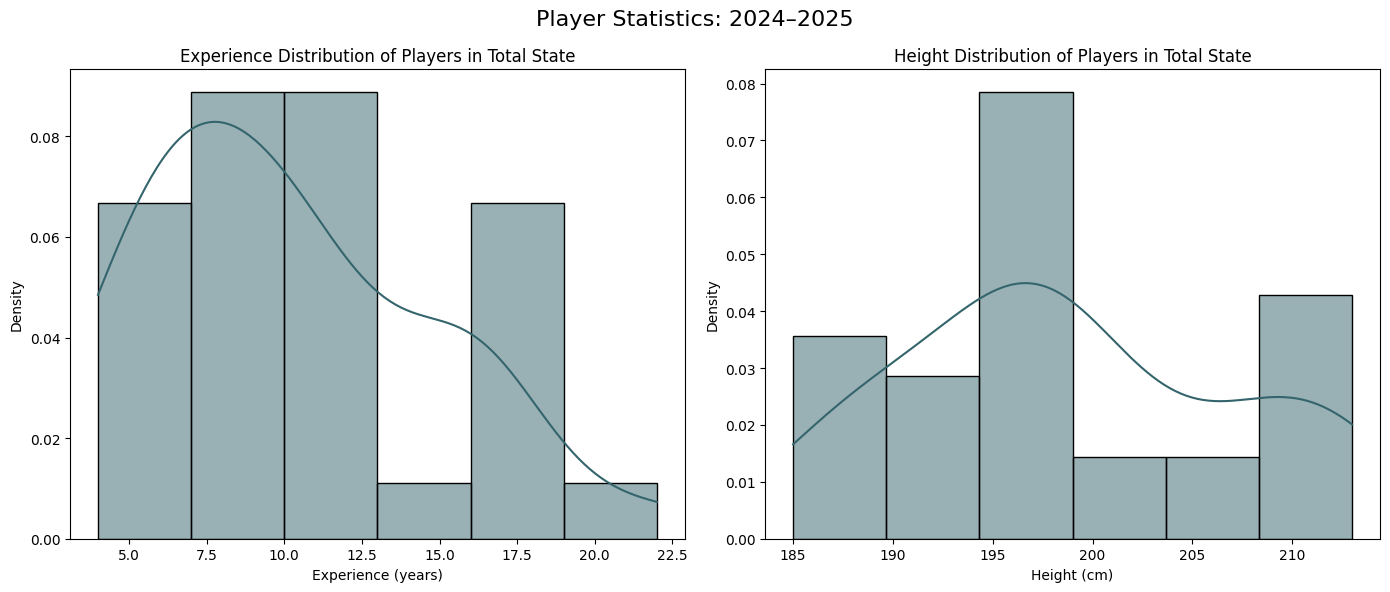

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(last_two_years_ts_players['experience_years'], kde=True, color='#34656D', stat='density', ax=axes[0])
axes[0].set_title('Experience Distribution of Players in Total State')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Density')

sns.histplot(last_two_years_ts_players['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[1])
axes[1].set_title('Height Distribution of Players in Total State')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2024–2025', fontsize=16)

plt.tight_layout()
plt.show()

In [144]:
height_stats = last_two_years_ts_players[['experience_years', 'height_cm']].describe()
height_stats

,experience_years,height_cm
count,30.000000,30.000000
mean,10.166667,198.866667
std,4.586963,8.265981
min,4.000000,185.000000
25%,7.000000,193.000000
50%,10.000000,198.000000
75%,12.750000,205.250000
max,22.000000,213.000000


In [145]:
twenty_four_ts_players = top_players_each_season[top_players_each_season['season'] == 2024]
twenty_four_ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
225,225Luk,Luka Dončić,198,104,24,7,1.0,2024,TS,24,3
226,226Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,TS,24,3
227,227Gia,Giannis Antetokounmpo,211,109,29,12,3.0,2024,TS,24,3
228,228Jal,Jalen Brunson,188,86,27,7,4.0,2024,TS,24,3
229,229Nik,Nikola Jokić,211,128,28,10,5.0,2024,TS,24,3
230,230Ant,Anthony Edwards,193,102,22,5,6.0,2024,TS,24,3
231,231Kev,Kevin Durant,211,108,35,17,7.0,2024,TS,24,3
232,232Jay,Jayson Tatum,203,95,25,8,8.0,2024,TS,24,3
233,233De',De'Aaron Fox,190,83,26,8,9.0,2024,TS,24,3
234,234Ste,Stephen Curry,188,83,35,16,10.0,2024,TS,24,3


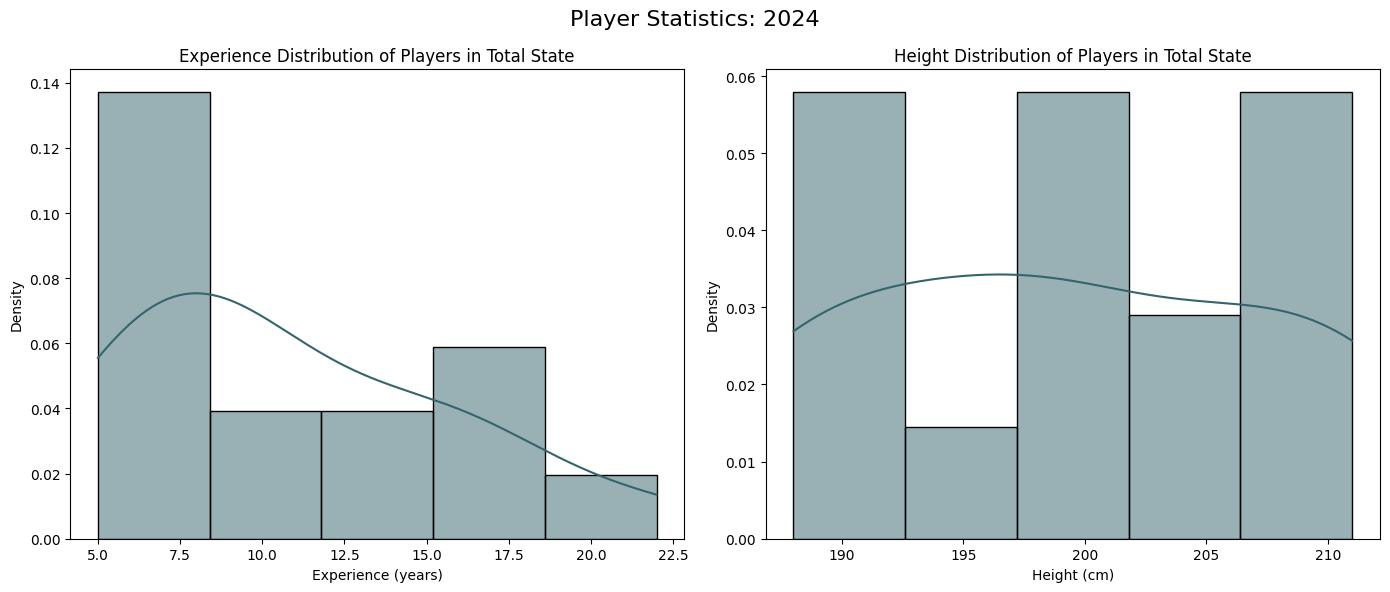

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(twenty_four_ts_players['experience_years'], kde=True, color='#34656D', stat='density', ax=axes[0])
axes[0].set_title('Experience Distribution of Players in Total State')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Density')

sns.histplot(twenty_four_ts_players['height_cm'], kde=True, color='#34656D', stat='density', ax=axes[1])
axes[1].set_title('Height Distribution of Players in Total State')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2024', fontsize=16)

plt.tight_layout()
plt.show()

In [147]:
height_stats = twenty_four_ts_players[['experience_years', 'height_cm']].describe()
height_stats

,experience_years,height_cm
count,15.000000,15.000000
mean,10.866667,199.266667
std,5.012366,8.705226
min,5.000000,188.000000
25%,7.000000,191.500000
50%,10.000000,198.000000
75%,14.500000,207.000000
max,22.000000,211.000000


In [149]:
twenty_five_ts_players = top_players_each_season[top_players_each_season['season'] == 2025]
twenty_five_ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
205,205Dev,Devin Booker,198,93,28,10,6.0,2025,TS,25,3
206,206Tra,Trae Young,185,74,26,7,7.0,2025,TS,25,3
207,207Tyl,Tyler Herro,196,88,25,6,8.0,2025,TS,25,3
208,208Cad,Cade Cunningham,198,99,23,4,9.0,2025,TS,25,3
209,209Jam,James Harden,196,99,35,16,10.0,2025,TS,25,3


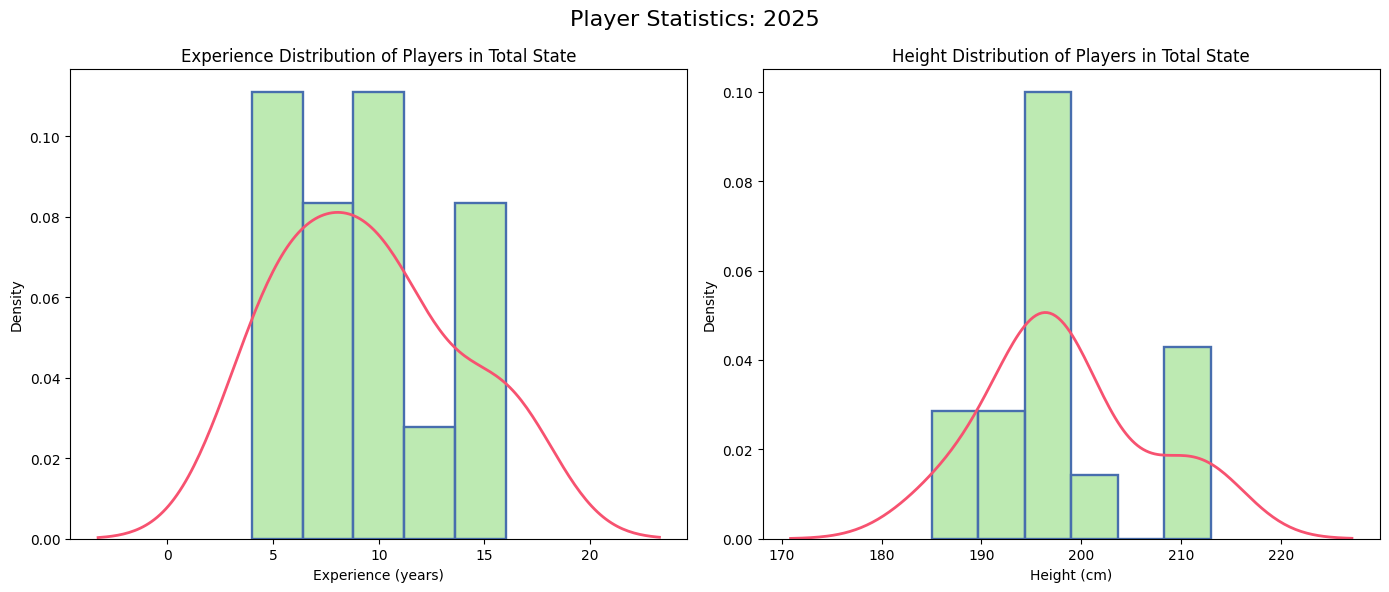

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# sns.histplot(twenty_five_ts_players['experience_years'], kde=True, color='#34656D', stat='density', ax=axes[0])
sns.histplot(
    twenty_five_ts_players['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0]
)
sns.kdeplot(
    twenty_five_ts_players['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[0]
)
axes[0].set_title('Experience Distribution of Players in Total State')
axes[0].set_xlabel('Experience (years)')
axes[0].set_ylabel('Density')

# sns.histplot(twenty_five_ts_players['height_cm'], kde=True, color='#A7E399', edgecolor='#476EAE', linewidth=1.2, stat='density', ax=axes[1])
sns.histplot(
    twenty_five_ts_players['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1]
)
sns.kdeplot(
    twenty_five_ts_players['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[1]
)
axes[1].set_title('Height Distribution of Players in Total State')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2025', fontsize=16)

plt.tight_layout()
plt.show()

In [151]:
height_stats = twenty_five_ts_players[['experience_years', 'height_cm']].describe()
height_stats

,experience_years,height_cm
count,15.000000,15.000000
mean,9.466667,198.466667
std,4.172472,8.087615
min,4.000000,185.000000
25%,6.500000,194.500000
50%,10.000000,198.000000
75%,11.500000,200.500000
max,16.000000,213.000000


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
باشگاهی میخواهد در فصل بعدی شروع قوی داشته باشد و معتقد است اگر بر روی پوزیشنی
سرمایهگذاری کند که معموالا هوش بسکتبالی خوبی بالایی نیاز دارد و بازیکنی توانا برای این پوزیشن
خریداری کند، میتواند شانس خود را برای موفق در فصل بعدی افزایش دهد. به همین دلیل میخواهد
بازیکنی در پوزیشن Point Guard خریداری کند که توانایی بالایی داشته باشد. معیار توانایی برای این
باشگاه، وجود بازیکن در لیست Michael Jordan Trophy میباشد و بازیکنی که حضور بیشتری داشته،
اولویت بالاتری دارد. لیستی از بازیکنان مناسب برای خرید با توجه به آمار فصلها از فصل ۲۰۲۰-۲۰۱۹ تا
پایان ۲۰۲۴-۲۰۲۳ تهیه کنید و ۳ پیشنهاد به این باشگاه ارائه دهید.
</p>

In [154]:
position_data

,ID,positions,ID_positions
0,0Sha,Point Guard,2
1,0Sha,Shooting Guard,4
2,1Jal,Shooting Guard,4
3,1Jal,Power Forward,3
4,2Lug,Small Forward,5
...,...,...,...
638,347Sha,Shooting Guard,4
639,348T.J,Small Forward,5
640,348T.J,Power Forward,3
641,349Spe,Point Guard,2


In [155]:
position_point_gaurd = position_data[position_data['positions'] == 'Point Guard']
position_point_gaurd

,ID,positions,ID_positions
0,0Sha,Point Guard,2
13,8Ale,Point Guard,2
32,21Jru,Point Guard,2
35,22Der,Point Guard,2
39,25Pay,Point Guard,2
...,...,...,...
617,336Rus,Point Guard,2
623,339Zac,Point Guard,2
636,346Col,Point Guard,2
637,347Sha,Point Guard,2


In [156]:
merged_player_season_group

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
...,...,...,...,...,...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9,21.0,2020,TS,20,3
346,346Col,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3
348,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3


In [157]:
merged_player_season_group_pointgaurd = pd.merge(position_point_gaurd, merged_player_season_group, on='ID')
merged_player_season_group_pointgaurd

,ID,positions,ID_positions,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Point Guard,2,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,8Ale,Point Guard,2,Alex Caruso,196,84,30,8,NaN,2025,LC,25,2
2,21Jru,Point Guard,2,Jrue Holiday,193,92,33,16,NaN,2024,LC,24,2
3,22Der,Point Guard,2,Derrick White,193,86,29,8,NaN,2024,LC,24,2
4,25Pay,Point Guard,2,Payton Pritchard,185,88,26,5,NaN,2024,LC,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,336Rus,Point Guard,2,Russell Westbrook,193,90,31,17,12.0,2020,TS,20,3
153,339Zac,Point Guard,2,Zach LaVine,196,90,24,11,15.0,2020,TS,20,3
154,346Col,Point Guard,2,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3
155,347Sha,Point Guard,2,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3


In [158]:
best_players = merged_player_season_group_pointgaurd[merged_player_season_group_pointgaurd['groupName'] == 'MJT']
best_players

,ID,positions,ID_positions,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
29,115Sha,Point Guard,2,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,MJT,25,1
30,117Gia,Point Guard,2,Giannis Antetokounmpo,211,109,30,12,3.0,2025,MJT,25,1
31,119Don,Point Guard,2,Donovan Mitchell,190,97,28,8,5.0,2025,MJT,25,1
32,120LeB,Point Guard,2,LeBron James,206,113,40,22,6.0,2025,MJT,25,1
33,121Cad,Point Guard,2,Cade Cunningham,198,99,23,4,7.0,2025,MJT,25,1
34,123Ste,Point Guard,2,Stephen Curry,188,83,36,16,9.0,2025,MJT,25,1
35,124Jal,Point Guard,2,Jalen Brunson,188,86,28,7,10.0,2025,MJT,25,1
36,125Jam,Point Guard,2,James Harden,196,99,35,16,10.0,2025,MJT,25,1
37,128Sha,Point Guard,2,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,MJT,24,1
38,129Luk,Point Guard,2,Luka Dončić,198,104,24,7,3.0,2024,MJT,24,1


In [165]:
num_unique_players = best_players['ID'].nunique() 
num_unique_players

49

In [166]:
num_unique_players = best_players['player_name'].nunique() 
num_unique_players

17

In [167]:
player_counts = best_players.groupby('player_name').size().reset_index(name='count')
player_counts_sorted = player_counts.sort_values(by='count', ascending=False)

player_counts_sorted.head(3)

,player_name,count
8,Giannis Antetokounmpo,7
13,Luka Dončić,5
16,Stephen Curry,5


# Hypothesis

## First Hypothesis

In [210]:
top_ts_players = ts_players[ts_players['rank'] <= 20]
top_ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
...,...,...,...,...,...,...,...,...,...,...,...
340,340DeM,DeMar DeRozan,198,99,30,16,16.0,2020,TS,20,3
341,341Bra,Brandon Ingram,203,86,22,9,17.0,2020,TS,20,3
342,342Nik,Nikola Jokić,211,128,24,10,18.0,2020,TS,20,3
343,343Tob,Tobias Harris,203,102,27,14,19.0,2020,TS,20,3


In [216]:
top_ts_players = top_ts_players.copy()
top_ts_players['agility'] = top_ts_players['height_cm'] / top_ts_players['weight_kg']
top_ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,agility
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3,2.200000
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3,1.892157
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3,1.648438
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3,1.935780
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3,2.136842
...,...,...,...,...,...,...,...,...,...,...,...,...
340,340DeM,DeMar DeRozan,198,99,30,16,16.0,2020,TS,20,3,2.000000
341,341Bra,Brandon Ingram,203,86,22,9,17.0,2020,TS,20,3,2.360465
342,342Nik,Nikola Jokić,211,128,24,10,18.0,2020,TS,20,3,1.648438
343,343Tob,Tobias Harris,203,102,27,14,19.0,2020,TS,20,3,1.990196


In [219]:
ts_players_past_seasons = top_ts_players[(top_ts_players['season'] >= 2021) & (top_ts_players['season'] <= 2022)]
ts_players_past_seasons

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,agility
275,275Tra,Trae Young,185,74,23,7,1.0,2022,TS,22,3,2.500000
276,276DeM,DeMar DeRozan,198,99,32,16,2.0,2022,TS,22,3,2.000000
277,277Joe,Joel Embiid,213,127,27,9,3.0,2022,TS,22,3,1.677165
278,278Jay,Jayson Tatum,203,95,23,8,4.0,2022,TS,22,3,2.136842
279,279Nik,Nikola Jokić,211,128,26,10,5.0,2022,TS,22,3,1.648438
280,280Gia,Giannis Antetokounmpo,211,109,27,12,6.0,2022,TS,22,3,1.935780
281,281Luk,Luka Dončić,198,104,22,7,7.0,2022,TS,22,3,1.903846
282,282Dev,Devin Booker,198,93,25,10,8.0,2022,TS,22,3,2.129032
283,283Kar,Karl-Anthony Towns,213,112,26,10,9.0,2022,TS,22,3,1.901786
284,284Don,Donovan Mitchell,190,97,25,8,10.0,2022,TS,22,3,1.958763


In [220]:
ts_players_recent_seasons = top_ts_players[(top_ts_players['season'] >= 2023) & (top_ts_players['season'] <= 2024)]
ts_players_recent_seasons

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,agility
225,225Luk,Luka Dončić,198,104,24,7,1.0,2024,TS,24,3,1.903846
226,226Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,TS,24,3,2.200000
227,227Gia,Giannis Antetokounmpo,211,109,29,12,3.0,2024,TS,24,3,1.935780
228,228Jal,Jalen Brunson,188,86,27,7,4.0,2024,TS,24,3,2.186047
229,229Nik,Nikola Jokić,211,128,28,10,5.0,2024,TS,24,3,1.648438
230,230Ant,Anthony Edwards,193,102,22,5,6.0,2024,TS,24,3,1.892157
231,231Kev,Kevin Durant,211,108,35,17,7.0,2024,TS,24,3,1.953704
232,232Jay,Jayson Tatum,203,95,25,8,8.0,2024,TS,24,3,2.136842
233,233De',De'Aaron Fox,190,83,26,8,9.0,2024,TS,24,3,2.289157
234,234Ste,Stephen Curry,188,83,35,16,10.0,2024,TS,24,3,2.265060


In [227]:
past_agility_mean = ts_players_past_seasons['agility'].mean()
print(f'Average Agility (Past Seasons): {past_agility_mean:.3f}')

Average Agility (Past Seasons): 2.038


In [228]:
recent_agility_mean = ts_players_recent_seasons['agility'].mean()
print(f'Average Agility (Recent Seasons): {recent_agility_mean:.3f}')

Average Agility (Recent Seasons): 2.039


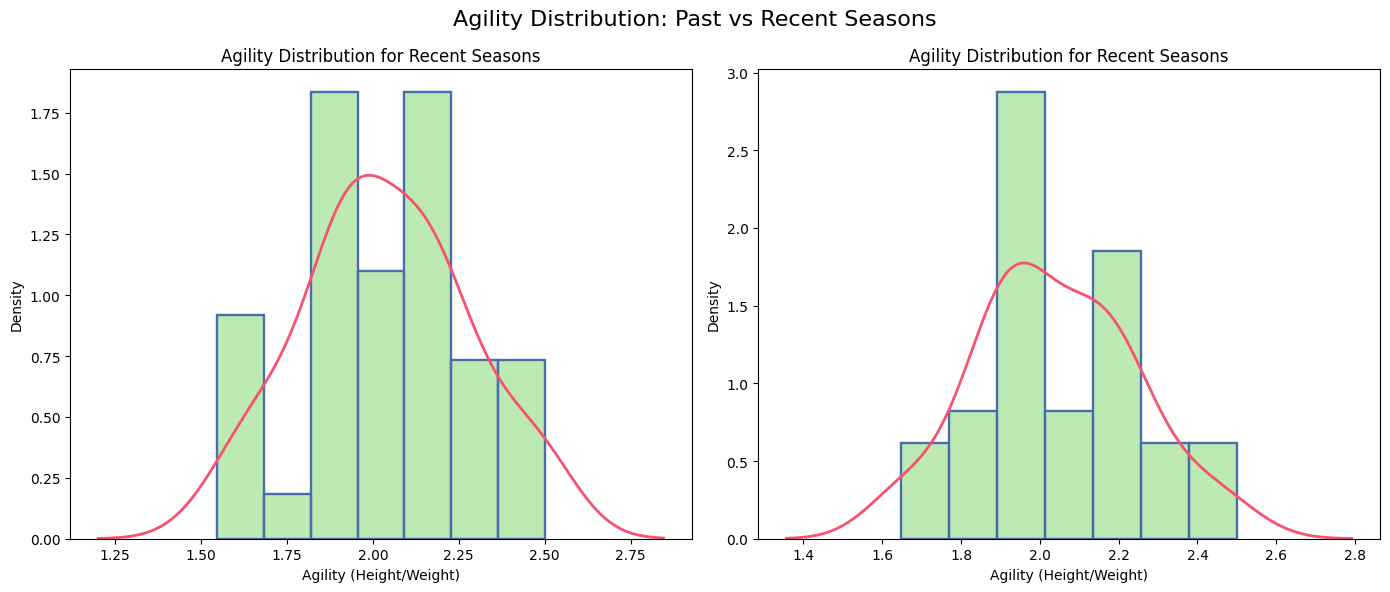

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    ts_players_past_seasons['agility'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0]
)
sns.kdeplot(
    ts_players_past_seasons['agility'],
    color='#F75270',
    lw=2,
    ax=axes[0]
)
axes[0].set_title('Agility Distribution for Recent Seasons')
axes[0].set_xlabel('Agility (Height/Weight)')
axes[0].set_ylabel('Density')

sns.histplot(
    ts_players_recent_seasons['agility'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1]
)
sns.kdeplot(
    ts_players_recent_seasons['agility'],
    color='#F75270',
    lw=2,
    ax=axes[1]
)
axes[1].set_title('Agility Distribution for Recent Seasons')
axes[1].set_xlabel('Agility (Height/Weight)')
axes[1].set_ylabel('Density')

fig.suptitle('Agility Distribution: Past vs Recent Seasons', fontsize=16)

plt.tight_layout()
plt.show()

In [230]:
agility_stats = ts_players_past_seasons['agility'].describe()
agility_stats

count    40.000000
mean      2.037784
std       0.241244
min       1.546875
25%       1.903331
50%       1.985294
75%       2.177778
max       2.500000
Name: agility, dtype: float64

In [231]:
agility_stats = ts_players_recent_seasons['agility'].describe()
agility_stats

count    40.000000
mean      2.039422
std       0.203159
min       1.648438
25%       1.903846
50%       2.000000
75%       2.179845
max       2.500000
Name: agility, dtype: float64

In [235]:
past_agility = ts_players_past_seasons['agility']
recent_agility = ts_players_recent_seasons['agility']

stat_past, p_value_past = shapiro(past_agility)
print(f'Past Seasons: p-value = {p_value_past:.3f}')
if p_value_past > 0.05:
    print('✅ Data is normal.')
else:
    print('❌ Data is NOT normal.')

stat_recent, p_value_recent = shapiro(recent_agility)
print(f'Recent Seasons: p-value = {p_value_recent:.3f}')
if p_value_recent > 0.05:
    print('✅ Data is normal.')
else:
    print('❌ Data is NOT normal.')

Past Seasons: p-value = 0.437
✅ Data is normal.
Recent Seasons: p-value = 0.578
✅ Data is normal.


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
✅ اگر مقدار <b>p-value > 0.05</b> باشد ← داده نرمال است.  
<br><br>
❌ اگر مقدار <b>p-value < 0.05</b> باشد ← داده نرمال نیست. 
</p>

In [238]:
past_agility = ts_players_past_seasons['agility']
recent_agility = ts_players_recent_seasons['agility']

t_stat, p_value = ttest_ind(recent_agility, past_agility, equal_var=False)

print(f'T-test statistic: {t_stat:.3f}, P-value: {p_value:.3f}')

if p_value > 0.05:
    print('✅ No significant difference → Fail to reject H₀')
else:
    print('❌ Significant difference → Reject H₀')

T-test statistic: 0.033, P-value: 0.974
✅ No significant difference → Fail to reject H₀


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
✅ اگر مقدار <b>p-value > 0.05</b> باشد ← تفاوت معناداری وجود ندارد و فرض صفر (H₀) رد نمی‌شود.  
<br><br>
❌ اگر مقدار <b>p-value < 0.05</b> باشد ← تفاوت معنادار است و فرض صفر (H₀) رد می‌شود.  
</p>

## Second Hypothesis

In [ ]:
print("hello")